# UNIT I — Notebook 4: Feature Scaling & Normalization

## Objective

Till now, we have:
- Understood the dataset (Notebook 1)
- Handled missing values carefully (Notebook 2)
- Reduced skewness using log transformations (Notebook 3)

Now we answer:
1. Why scaling is needed
2. What happens if we don’t scale
3. Standardization vs Normalization
4. When to use which

⚠️ Important:
Scaling is applied **after** handling missing values and transformations.

## 1️⃣ A Critical Clarification: Mean vs Median (Why Median Was Used)

Before scaling, we must understand a key design choice we already made.

### Why NOT mean imputation for BMI?
- BMI had extreme values (up to ~100)
- Mean is sensitive to outliers
- Median is robust

### Effect of using MEAN instead of MEDIAN:
- Mean shifts towards extreme obesity cases
- Imputed values become artificially high
- Distribution gets distorted
- Downstream scaling amplifies this distortion

### Effect of using MEDIAN:
- Preserves central tendency
- Maintains original distribution shape
- Reduces bias before scaling

📌 **Key rule**:
> Imputation choice directly affects scaling and model behavior.

This is why **median → transform → scale** is the correct order.


## 2️⃣ Reload Dataset & Engineered Features (Clean State)

Each notebook must run independently.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

path = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(path)

# Recreate engineered features
df["bmi_missing_flag"] = df["bmi"].isna().astype(int)
df["bmi_imputed"] = df["bmi"].fillna(df["bmi"].median())

df["log_avg_glucose_level"] = np.log1p(df["avg_glucose_level"])
df["log_bmi_imputed"] = np.log1p(df["bmi_imputed"])

TARGET_COL = "stroke"
df.shape


(5110, 16)

## 3️⃣ Why Scaling Is Needed

Consider two features:
- `age`: range ≈ 0–82
- `avg_glucose_level`: range ≈ 55–270

If we compute distances or gradients:
- Larger-scale features dominate
- Smaller-scale features become less influential

Scaling does NOT:
- Fix skewness
- Remove outliers

Scaling ONLY:
- Brings features to comparable ranges


## 4️⃣ Two Main Scaling Techniques

### 1. Standardization (Z-score scaling)

Formula:
\[
z = \frac{x - \mu}{\sigma}
\]

Where:
- μ = mean
- σ = standard deviation

Effect:
- Centers data around 0
- Standard deviation becomes 1

Used when:
- Data is roughly symmetric
- Distance or gradient-based models are used

---

### 2. Normalization (Min-Max scaling)

Formula:
\[
x' = \frac{x - \min}{\max - \min}
\]

Effect:
- Data lies between 0 and 1

Used when:
- Bounds matter
- Visualization or neural networks are used


## 5️⃣ Select Features to Scale (Very Important)

We will scale ONLY continuous numeric features.

✅ Scale:
- age
- log_avg_glucose_level
- log_bmi_imputed

❌ Do NOT scale:
- stroke (target)
- hypertension (binary)
- heart_disease (binary)
- bmi_missing_flag (indicator)

In [2]:
scale_cols = ["age", "log_avg_glucose_level", "log_bmi_imputed"]
scale_cols

['age', 'log_avg_glucose_level', 'log_bmi_imputed']

## 6️⃣ Standardization (Z-score Scaling)

We apply StandardScaler and inspect the result.


In [3]:
scaler_std = StandardScaler()
df_std = df.copy()

df_std[scale_cols] = scaler_std.fit_transform(df[scale_cols])
df_std[scale_cols].head()

,age,log_avg_glucose_level,log_bmi_imputed
0,1.051434,2.324024,1.045711
1,0.786070,1.982522,0.022638
2,1.626390,0.192196,0.584773
3,0.255342,1.521365,0.805010
4,1.582163,1.567759,-0.583632


### Interpretation (After Standardization)

What we expect:
- Mean ≈ 0
- Standard deviation ≈ 1

Let’s verify numerically.

In [4]:
df_std[scale_cols].describe().loc[["mean", "std"]]

,age,log_avg_glucose_level,log_bmi_imputed
mean,5.005781e-17,-2.280411e-16,-1.037309e-15
std,1.000098e+00,1.000098e+00,1.000098e+00


## 7️⃣ Visual Comparison — Before vs After Standardization

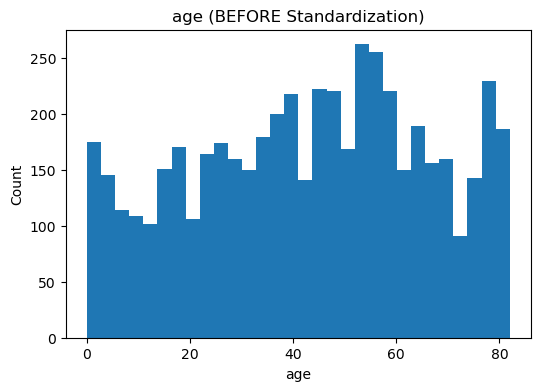

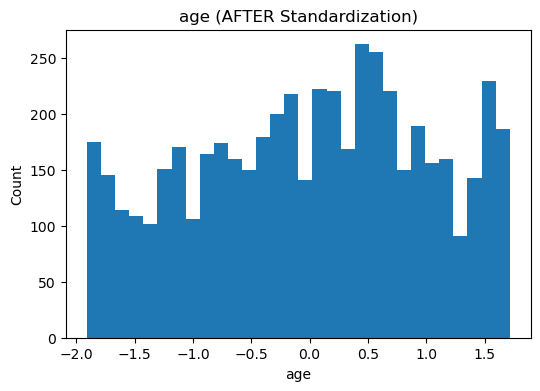

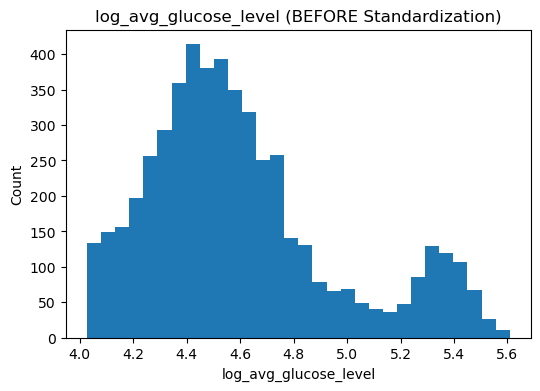

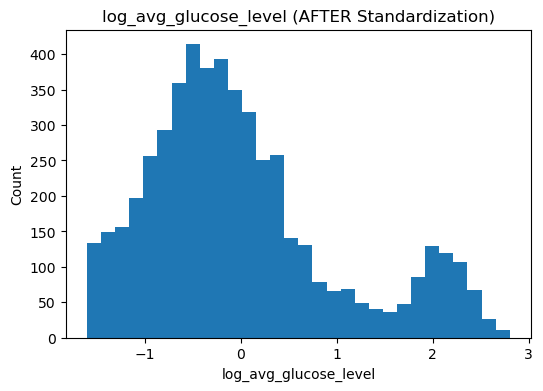

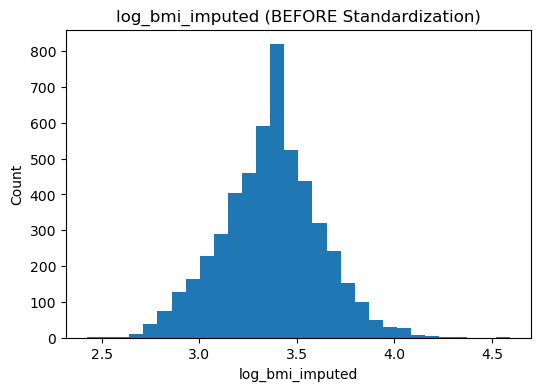

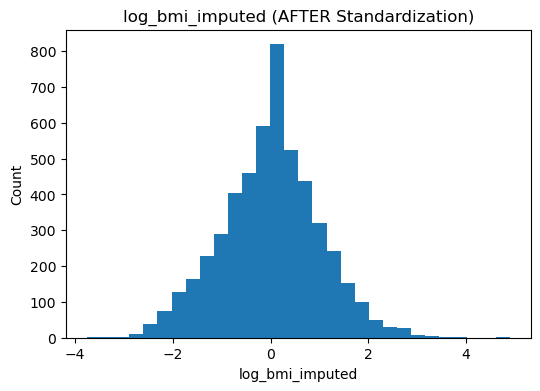

In [5]:
for col in scale_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.title(f"{col} (BEFORE Standardization)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(6,4))
    plt.hist(df_std[col], bins=30)
    plt.title(f"{col} (AFTER Standardization)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


### Explanation

- Shape remains similar
- Center shifts to 0
- Spread becomes uniform

⚠️ Scaling does NOT change distribution shape.
That’s why we transformed BEFORE scaling.


## 8️⃣ Normalization (Min-Max Scaling)

In [6]:
scaler_mm = MinMaxScaler()
df_mm = df.copy()

df_mm[scale_cols] = scaler_mm.fit_transform(df[scale_cols])
df_mm[scale_cols].head()


,age,log_avg_glucose_level,log_bmi_imputed
0,0.816895,0.891344,0.554964
1,0.743652,0.813868,0.436666
2,0.975586,0.407703,0.501666
3,0.597168,0.709247,0.527132
4,0.963379,0.719772,0.366563


### Visual Comparison — Before vs After Normalization


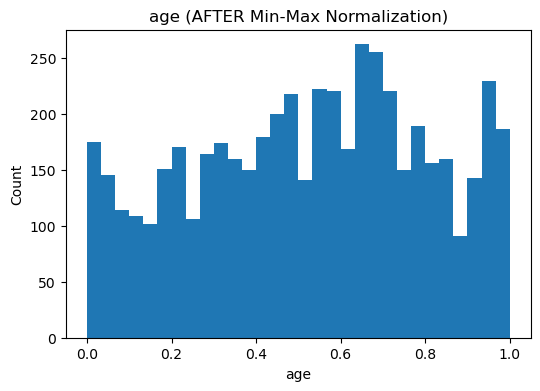

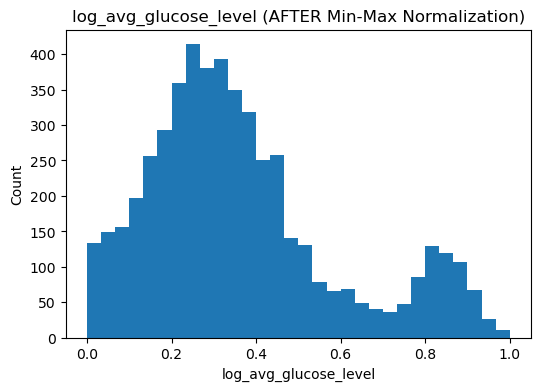

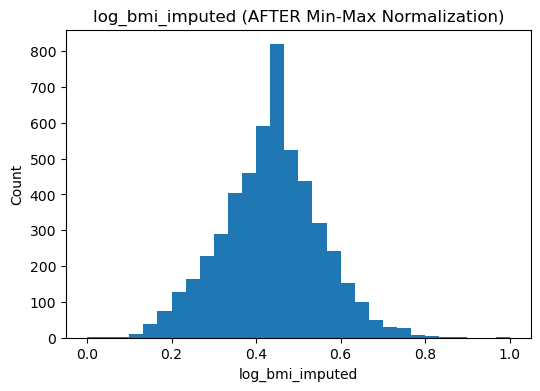

In [7]:
for col in scale_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df_mm[col], bins=30)
    plt.title(f"{col} (AFTER Min-Max Normalization)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


### Explanation

- All values now lie between 0 and 1
- Relative spacing is preserved
- Extreme values still exist (but bounded)

Normalization is useful when:
- Model expects bounded inputs
- Feature ranges must be comparable


## 9️⃣ Standardization vs Normalization — When to Use What?

| Situation | Use |
|---------|-----|
| Linear / Logistic Regression | Standardization |
| SVM / KNN | Standardization |
| Neural Networks | Normalization |
| Tree-based Models | Scaling not required |

📌 Trees split on thresholds, not distances.


## 10️⃣ What We Did NOT Do (Intentionally)

❌ Outlier removal  
❌ Robust scaling  
❌ Feature selection  
❌ Interaction features  

These belong to **advanced datasets** where feature engineering is mandatory.


## 11️⃣ Notebook 4 Summary

We learned:
- Why median was used instead of mean
- Why scaling is needed
- Difference between standardization and normalization
- How scaling affects data
- Why scaling comes AFTER transformation

At this point, data is:
✔ Clean  
✔ Transformed  
✔ Scaled  
✔ Model-ready (from a preprocessing perspective)
